# Welcome to Tryolabs' machine learning interview

If you are here, it's because your profile has already caught our attention. Congratulations!
This is a test so we can better learn about your skills by having you solve a real Machine Learning problem. The outcome is not the most important thing, we want to see your thought process and how you approach the problem, so make sure you write down everything you evaluate to do, approaches that didn't work, etc

# The project

The problem we want to analyze is [this Kaggle competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

# What we expect

* An end to end solution, this means you need to be able to understand the description of the problem from the text, download the dataset, train and evaluate the model.
* We'll pay special attention to code quality and common pitfalls.
* You need to be able to explain each step and why it is there.
* Explain the data analysis you performed.

# The extra mile

* Carry on a dataset inconsistencies analysis.
* Explain what the models are taking into account to generate the predictions.
* In depth error analysis.

# The dataset

To make it accessible from your Colab notebook you need to mount your Drive:
```python
from google.colab import drive
drive.mount('/content/drive')
```
To check if you can access it from the notebook run:
```bash
%ls /content/drive/'My Drive'/Tryolabs-ML-Interview/data
```

To learn more about how Colab works check [this guide](https://colab.research.google.com/notebooks/welcome.ipynb).

In [891]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import QuantileTransformer, StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

%matplotlib inline

Loading the data </br>
The kaggle competition gives a test dataset to test our final model ; this was not provided in the data folder, hence I'll continue as if this does not exist </br> One thing to always keep in mind is our objective: we want to predict the price of a house given certain attributes of this one

In [892]:
data_path = "./data/"
train = pd.read_csv(data_path + "train.csv")

In [893]:
print(train.shape)
print(train.info())
train.head(3)

(1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


### Exploratory Data Analysis

The EDA will consist of the following steps:
- read the given description file and try to grab intuition on the dataset, without meddling without the data, which are the most *important* features &rarr; see: https://docs.google.com/spreadsheets/d/1VMhSXP48gpDERHgkHEh1uaIw2K0I2-3xyA6jZCmCB-g/edit?usp=sharing
- analyze price and correlations to features

In [894]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

A read of the description of the features makes us think:
- there are various groups of correlated features. For example the number of bedrooms and the total number of rooms
- there are columns that have a lot of missing values: pool related (if there is no pool)
- the following are intuitively the most important features:
    - LotArea
    - MSSubClass
    - MSZoning
    - Neighborhood
    - OverallQual
    - OverallCond
    - YearBuilt
    - GrLivArea
    - BedroomAbvGr
    - KitchenQual
    - SaleType

Let's go on to analyze the price on its own

skeweness: 1.88
kurtosis: 6.54


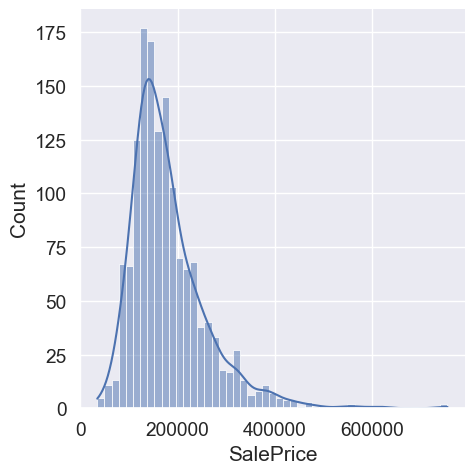

In [895]:
sns.displot(train["SalePrice"], kde=True);
print("skeweness: %.2f" % train["SalePrice"].skew())
print("kurtosis: %.2f" % train["SalePrice"].kurtosis())

Important! The price is right-skewed &rarr; presence of outliers to the right and kurtosis > 3 &rarr; again presence of outliers because most of the data is around mean

Let's now analyse how does the price correlate to our features

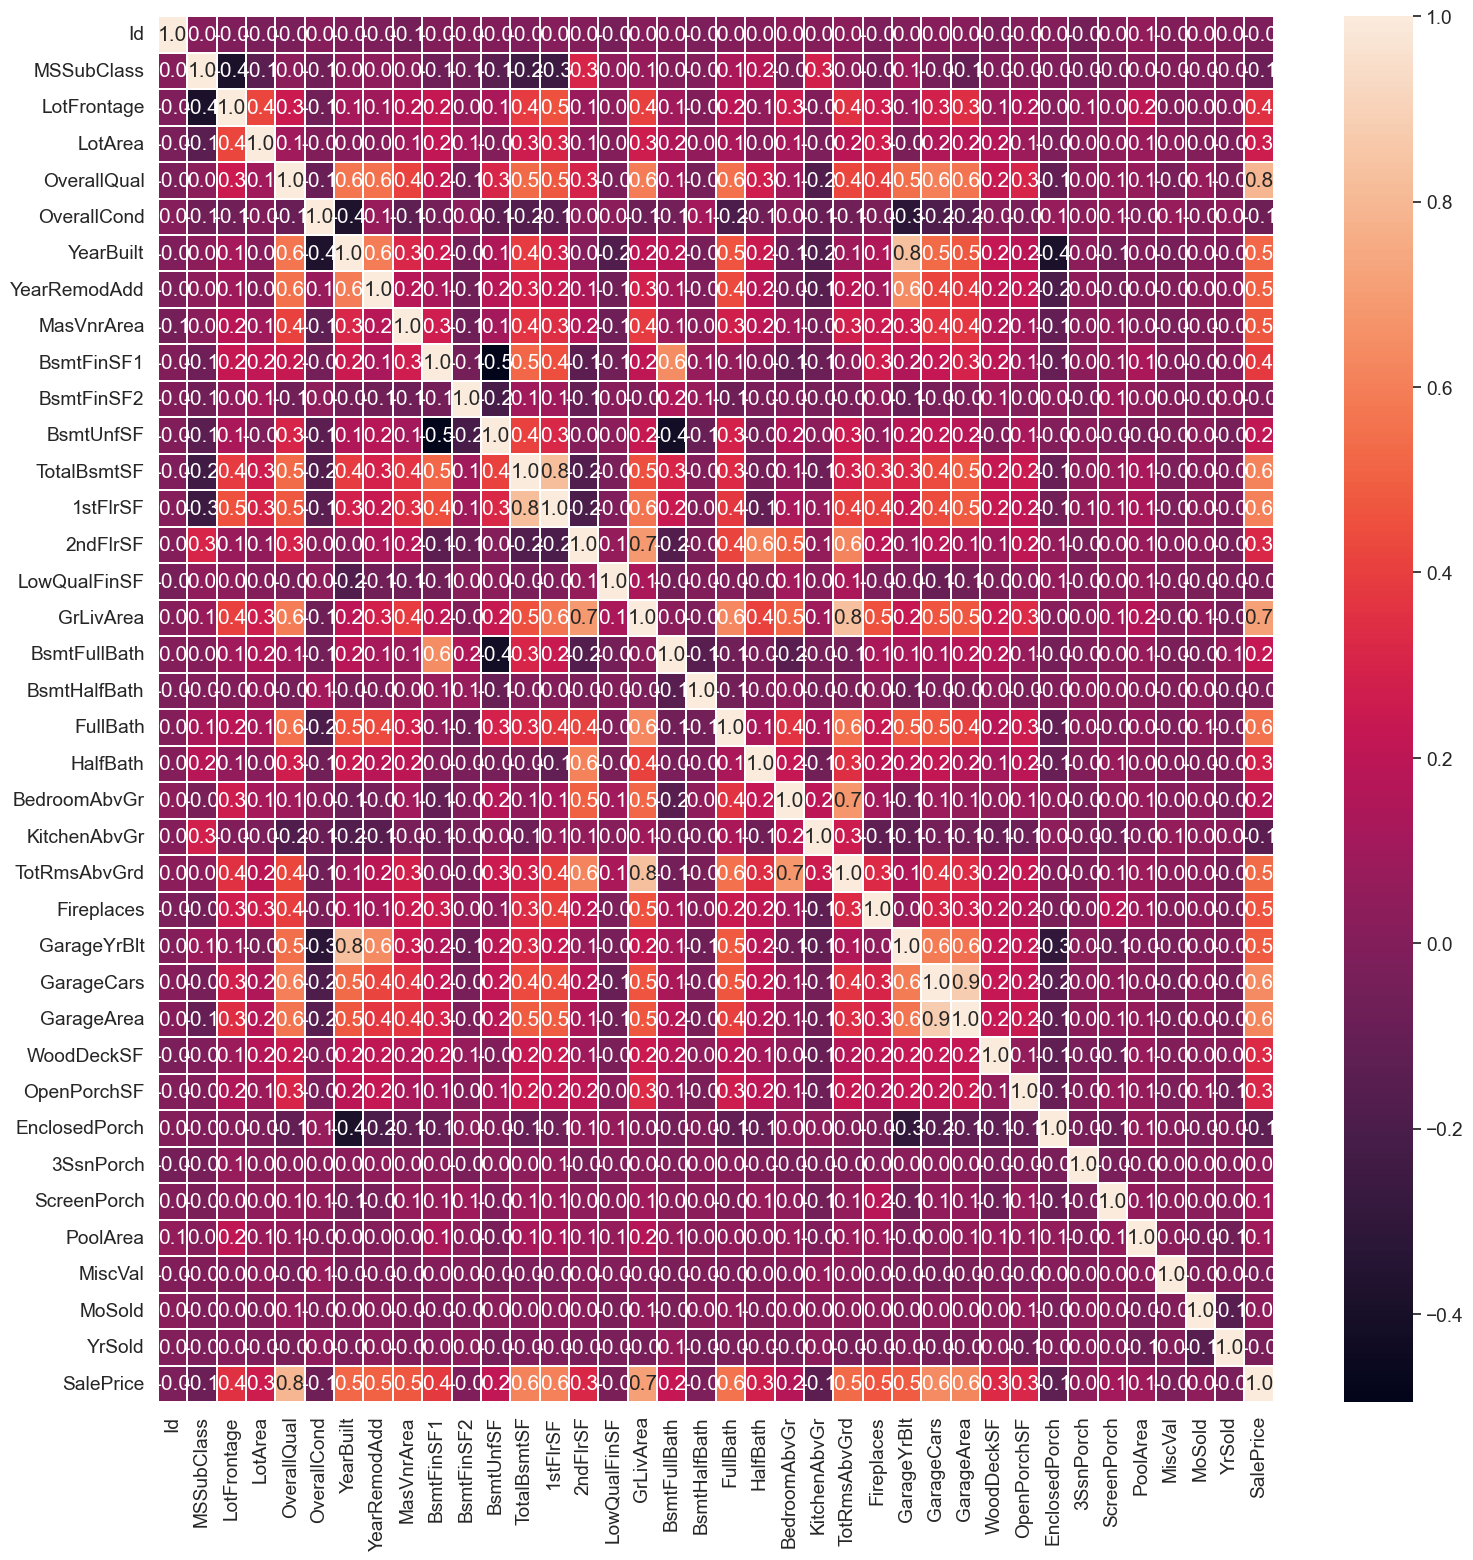

In [896]:
corrmat = train.corr(numeric_only=True)
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(corrmat, annot=True, linewidths=.25, fmt= '.1f',ax=ax);

Observing the last row we realize that our intuition was somwhow right, the most important features seem to be:
- OverallQual
- YearBuilt
- TotalBsmntSF: highly correlated with 1stFl
- GrLivArea
- FullBath
- TotRoomsAbvGrd
- GarageCars: highly correlated with GarageArea

Let's further analyze these features

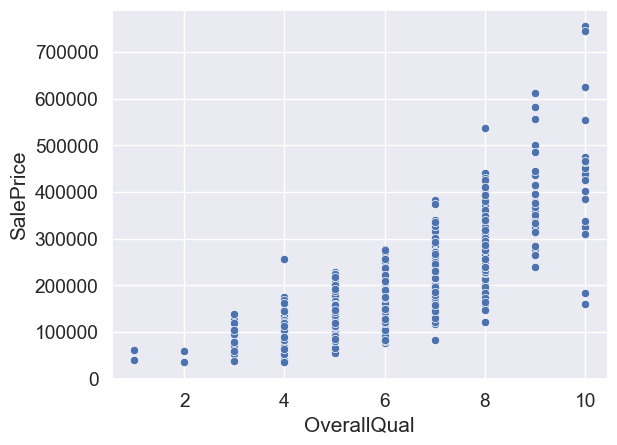

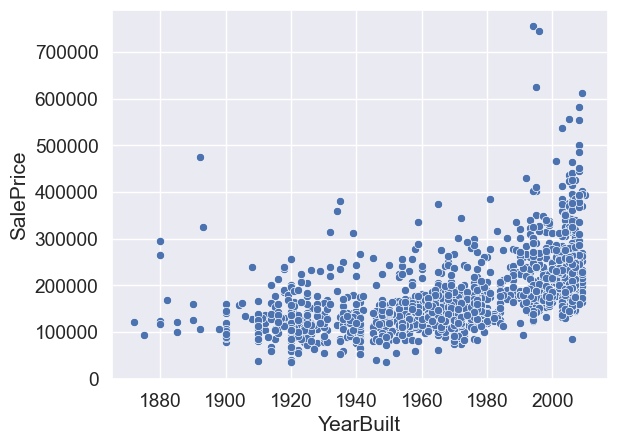

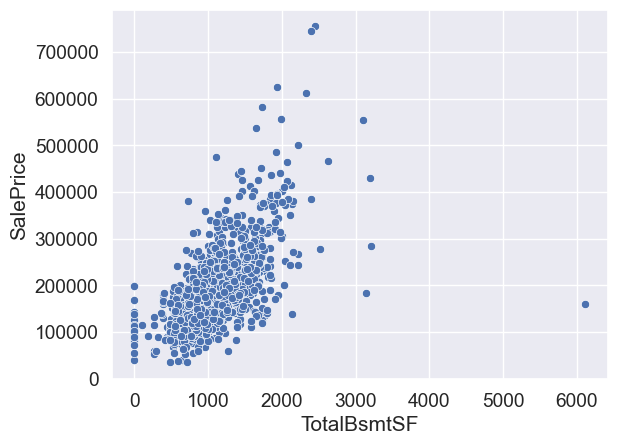

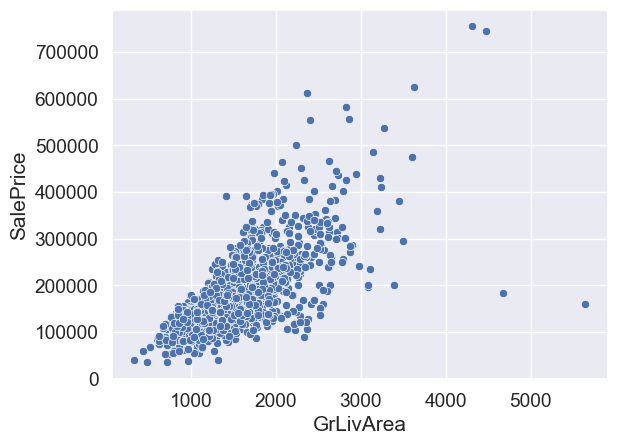

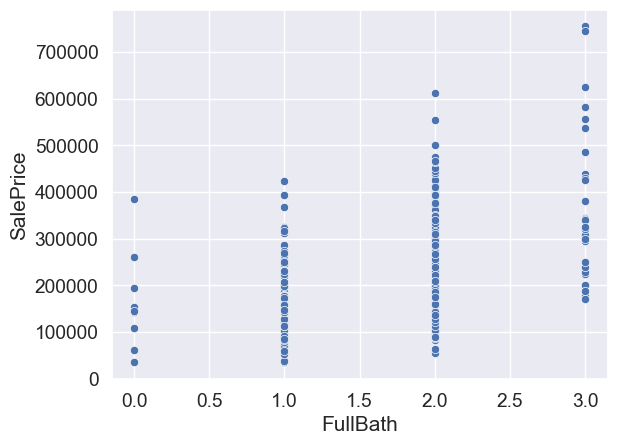

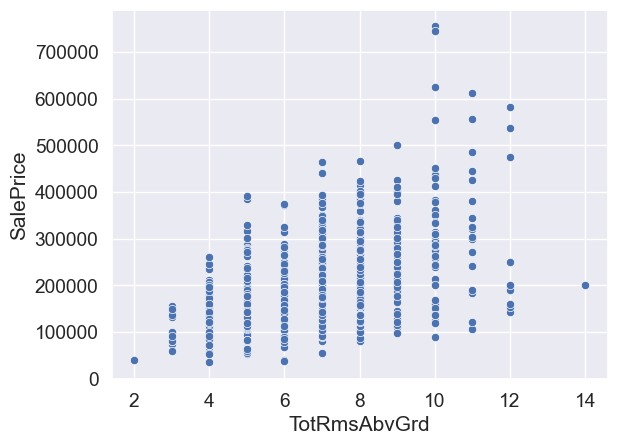

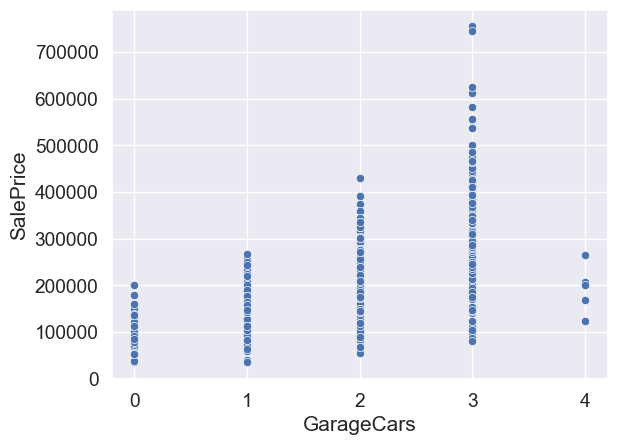

In [897]:
features = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars']
for f in features:
    plt.figure()
    sns.scatterplot(x=train[f], y=train["SalePrice"])

Analyzing the figures we observe the following that the price increases as *the feature gets better* ; this are all positive things for a house it makes sense. we also note the presence of outliers which we will deal later once we have correctly *scaled* the price

##### Missing values and outliers

To handle missing values we will follow one of two approaches: drop the column/row or fill the missing values with median (or mean)/most frequent value. it will depend on the feature missing which approach
<br>
As observed before there are a few outliers hence we might just delete those rows

In [898]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data["Total"] > 0]

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
MasVnrType,872,0.597260
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
GarageCond,81,0.055479
GarageType,81,0.055479


- For features which are missing more than 40% percent of the data we will just delete those columns
- For the LotFrontage feature analyzing the heatmap it is not strongly correlated to any other feature: we cannot deduce its missing values from another column. Plus it is missing almost 20% of the rows &rarr; we will delete it as well
-  Since we analyzed that GarageCars and TotalBsmtFt are *important* features and these are correlated to the GarageX and Bsmt* features we might as well delete this columns
- The MasVnrArea does not make sense if the MasVnrType is not present then we will drop it as well
- The electrical has just 1 row missing --> we will delete such a row
- We will also drop the MoSold column ; just intuitive it should not matter and when looking at the heatmap it has correlation 0.0 with price

In [899]:
train_reduced = train.copy()
train_reduced = train_reduced.drop(list((missing_data[missing_data['Total'] > 1]).index)+['MoSold'],axis=1)
train_reduced = train_reduced.drop(train.loc[train['Electrical'].isnull()].index)

In [900]:
train_reduced.isnull().sum().any()

False

To get which points are outliers we first have to standarize our prices, here is why taking the log achieves this goal: https://dev.to/rokaandy/logarithmic-transformation-in-linear-regression-models-why-when-3a7c

skeweness: 0.12
kurtosis: 0.81


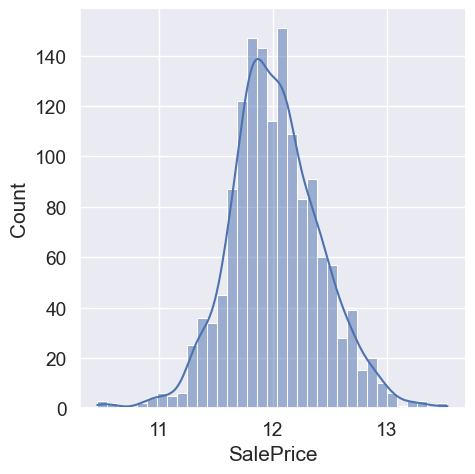

In [901]:
train_reduced['SalePrice'] = np.log(train_reduced['SalePrice']) #TODO: do not forget that when predicting new price in production we need to take the exponential
sns.displot(train_reduced["SalePrice"], kde=True);
print("skeweness: %.2f" % train_reduced["SalePrice"].skew())
print("kurtosis: %.2f" % train_reduced["SalePrice"].kurtosis())

As observed before there were some outliers in the ground living area and in the basement, let's plot both of them now

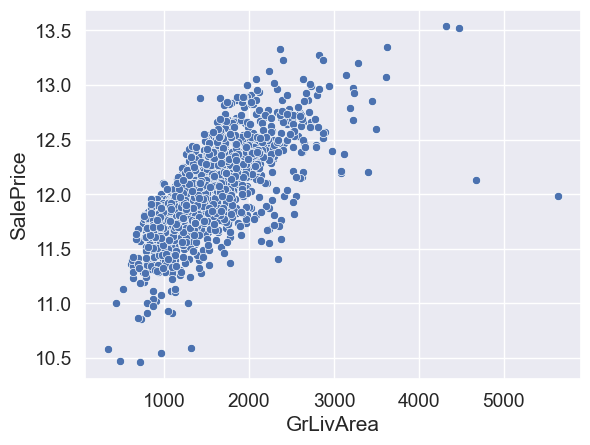

In [902]:
sns.scatterplot(x=train_reduced['GrLivArea'], y=train_reduced["SalePrice"]);

In [903]:
train_reduced.iloc[train_reduced['GrLivArea'].sort_values(ascending=False)[:4].index][['GrLivArea','SalePrice']]

,GrLivArea,SalePrice
1298,5642,11.982929
523,4676,12.126759
1182,4476,13.521139
691,4316,13.534473


We will considering an outlier as a value whose Ground living area is above 4000 but price below 12.5

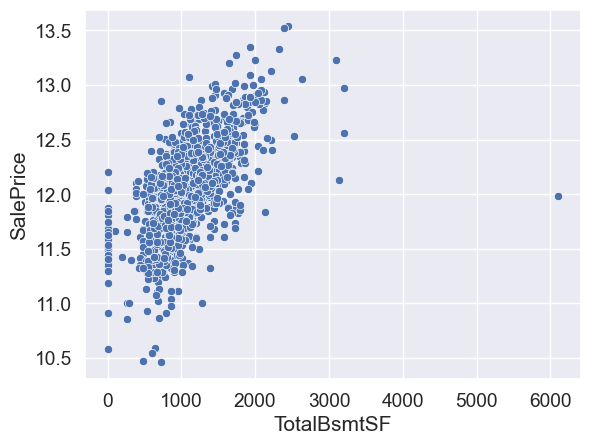

In [904]:
sns.scatterplot(x=train_reduced['TotalBsmtSF'], y=train_reduced["SalePrice"]);

In [905]:
train_reduced.iloc[train_reduced['TotalBsmtSF'].sort_values(ascending=False)[:4].index][['TotalBsmtSF','SalePrice']]

,TotalBsmtSF,SalePrice
1298,6110,11.982929
332,3206,12.556730
496,3200,12.971540
523,3138,12.126759


We will considering an outlier as a value whose Total basmeent area is above 4000 but price below 13

Note the outlier for BsmtSf also has been removed
<br>
We will now further explore some columns that we might decide to see if we really think they may be relevant

In [906]:
# TODO: analyze these plots to see which scaler to use: Standatd, Quantile, Robust, ...
#       also may want to analyze count of non-0 values --> maybe some features are not necessary 
# num_features = train.dtypes[train.dtypes != "object"].index
# cat_features = train.dtypes[train.dtypes == "object"].index
# print(num_features, cat_features)
# to_rem = ['Id','MSSubClass','OverallQual','OverallCond','MoSold','SalePrice']
# num_feats_to_check = [ft for ft in num_features if ft not in to_rem]
# for ft in num_feats_to_check:
#     plt.figure()
#     sns.histplot(X[ft]);

### Preprocessing 

We will now apply some transformations to the dataset in order for the models to have a better performance (for example in order to make them more robust to outliers). Plus we will encode categorical features, otherwise the models will not be able to handle these

In [907]:
# Handling missing values
def handle_missing_values(data, cols_to_drop, rows_to_drop):
    new_data = data.copy()
    new_data = new_data.drop(cols_to_drop,axis=1)
    new_data = new_data.drop(rows_to_drop)
    return new_data

In [908]:
# Find missing data
total = train.isnull().sum().sort_values(ascending=False)

cols_to_drop = list(total[total > 1].index)+['MoSold']
rows_to_drop = list(train.loc[train['Electrical'].isnull()].index)
train = handle_missing_values(train, cols_to_drop, rows_to_drop)
X, y = train.drop(['SalePrice','Id'],axis=1), np.log(train['SalePrice'])

In [909]:
num_features = X.dtypes[X.dtypes != "object"].index
cat_features = X.dtypes[X.dtypes == "object"].index
print(num_features, cat_features)

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'YrSold'],
      dtype='object') Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')


As we wrote in our spreadsheets:
- MSSubClass is actually a categorical feature  
- OverallQual/Cond is *already encoded* : it's just a value between 1-10
- We could categorize the years as well, by placing it in bins of decades, but we will just scale them

<br>

For the rest of the features we will first use a StandardScaler. We will try 2 different models:
- LinearRegression w/ Ridge (reguralization), 
- XGBRegressor (linear ensemble method)

In [910]:
num_features = np.array(X.dtypes[X.dtypes != "object"].index)
to_change = ['MSSubClass','OverallQual','OverallCond']
cat_features = list(X.dtypes[X.dtypes == "object"].index) + to_change
num_features = np.setdiff1d(num_features, to_change)

In [911]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features)
    ]
)

In [912]:
model_GB = GradientBoostingRegressor(n_estimators=100,
                                  n_iter_no_change=10,
                                  learning_rate=0.1)
model_LR = Ridge(alpha=1.0)
pipe_GB = Pipeline([
    ("preprocess", preprocessor),
    ("model", model_GB),
])
pipe_LR = Pipeline([
    ("preprocess", preprocessor),
    ("model", model_LR),
])
# pipe_LR.get_params()

In [913]:

paramsGB={
    "model__n_estimators": [100,30,500],
    "model__n_iter_no_change": [5,10,15],
    "model__learning_rate": [0.05,0.1,0.2]
}
paramsLR={
    "model__alpha": np.linspace(0,1.5,10)
}

In [914]:
def root_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(np.exp(y_true), np.exp(y_pred)))

def fit_grid_search(X_train, y_train, estimator, params):
    grid = GridSearchCV(estimator=estimator,
                        param_grid=params,
                        cv=5,
                        n_jobs=-1,
                        scoring={
                            'log_mean_sq_error': 'neg_mean_squared_error', 'r2': 'r2',
                            "root_mse": make_scorer(root_squared_error)},
                        refit='log_mean_sq_error'
                        )
    grid.fit(X_train, y_train)
    return grid

In [915]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [916]:
grid_GB = fit_grid_search(X_train, y_train, pipe_GB, paramsGB)
grid_LR = fit_grid_search(X_train, y_train, pipe_LR, paramsLR)

In [917]:
df_GB = pd.DataFrame(grid_GB.cv_results_)[["param_model__learning_rate","param_model__n_estimators","param_model__n_iter_no_change","mean_test_log_mean_sq_error","mean_test_root_mse","mean_test_r2"]].sort_values("mean_test_log_mean_sq_error",ascending=False)
df_GB.head(10)

,param_model__learning_rate,param_model__n_estimators,param_model__n_iter_no_change,mean_test_log_mean_sq_error,mean_test_root_mse,mean_test_r2
7,0.05,500,10,-0.021806,34818.977498,0.862710
26,0.2,500,15,-0.021895,35531.144527,0.861482
16,0.1,500,10,-0.021928,36126.616705,0.862398
17,0.1,500,15,-0.021936,35476.543576,0.862083
15,0.1,500,5,-0.022170,35767.018643,0.860404
8,0.05,500,15,-0.022200,35701.106399,0.860460
10,0.1,100,10,-0.022415,35521.667982,0.859644
25,0.2,500,10,-0.022487,36658.276871,0.857550
11,0.1,100,15,-0.022772,36576.877729,0.857145
19,0.2,100,10,-0.023018,37513.888817,0.855085


In [918]:
df_LR = pd.DataFrame(grid_LR.cv_results_)[["param_model__alpha","mean_test_log_mean_sq_error","mean_test_root_mse","mean_test_r2"]].sort_values("mean_test_log_mean_sq_error",ascending=False)
df_LR.head(10)

,param_model__alpha,mean_test_log_mean_sq_error,mean_test_root_mse,mean_test_r2
2,0.333333,-0.026280,54968.579130,0.834607
3,0.5,-0.026323,55729.526310,0.834272
4,0.666667,-0.026404,56295.108846,0.833683
1,0.166667,-0.026458,53932.061841,0.833426
5,0.833333,-0.026508,56758.633283,0.832937
6,1.0,-0.026600,57117.632367,0.832297
7,1.166667,-0.026676,57425.764115,0.831760
8,1.333333,-0.026742,57660.493438,0.831296
9,1.5,-0.026807,57927.827318,0.830855
0,0.0,-0.027854,53119.607172,0.823934


We found gradient boosting outperforms ridge. we will stay with such a model and tune it a little bit more. but let's analyze a little bit the ridge model a little bit more (just for fun)

<Axes: xlabel='param_model__alpha', ylabel='mean_test_log_mean_sq_error'>

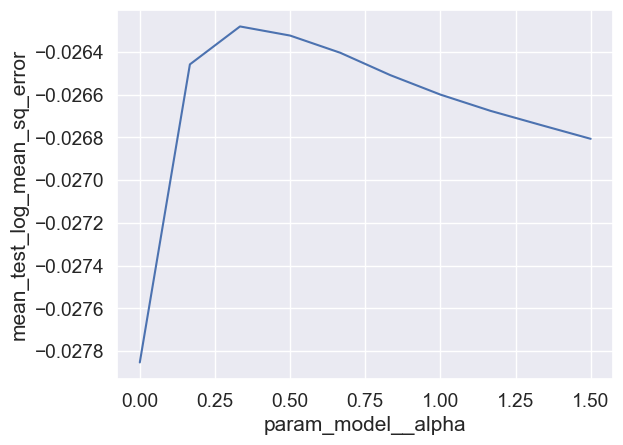

In [919]:
sns.lineplot(x=df_LR["param_model__alpha"],y=df_LR["mean_test_log_mean_sq_error"])

In [920]:
def get_features_dictionaries(coefs):
    preprocessor.fit(X_train)
    features = np.array(preprocessor.get_feature_names_out())
    num_feat_coef = {features[i]: coefs[i] for i in range(len(coefs)) if features[i].startswith("num")}
    num_feat_coef = dict(sorted(num_feat_coef.items(), key=lambda item: item[1]))
    cat_feat_coef = {features[i]: coefs[i] for i in range(len(coefs)) if not features[i].startswith("num")}
    cat_feat_coef = dict(sorted(cat_feat_coef.items(), key=lambda item: item[1]))
    return num_feat_coef, cat_feat_coef

<Figure size 3000x1800 with 0 Axes>

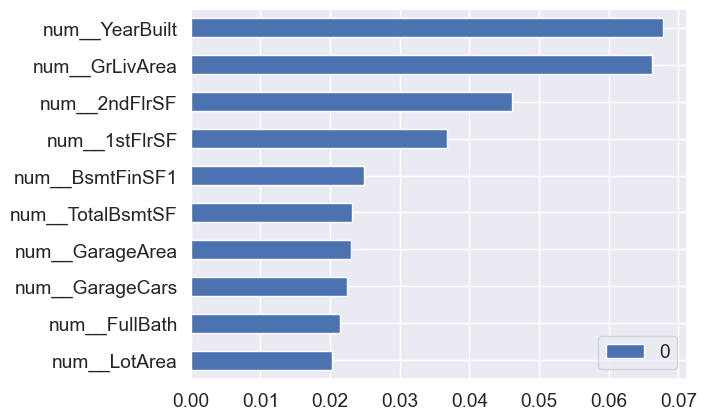

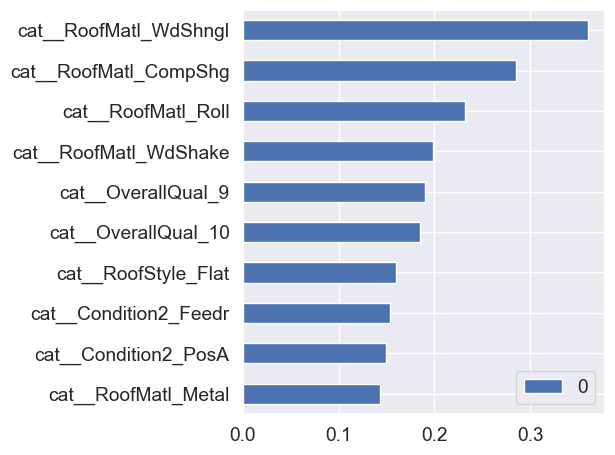

In [921]:
best_ridge = grid_LR.best_estimator_
coefs = np.array(best_ridge['model'].coef_)
num_feat_coef, cat_feat_coef = get_features_dictionaries(coefs)
plt.figure(figsize=(30,18))
coefs = pd.DataFrame.from_dict(num_feat_coef,orient='index')[-10:]
coefs.plot(kind="barh")
coefs = pd.DataFrame.from_dict(cat_feat_coef,orient='index')[-10:]
coefs.plot(kind="barh")
plt.tight_layout()

There are some things that do make sense, like ground living are and year built to be the most important numerical features. 
however for the categorical it maybe also depends on the number of categories (understand this)
<br>
<br>
As we said we will keep one of the models from gradient booster. Let's analyze the errors we measured. 

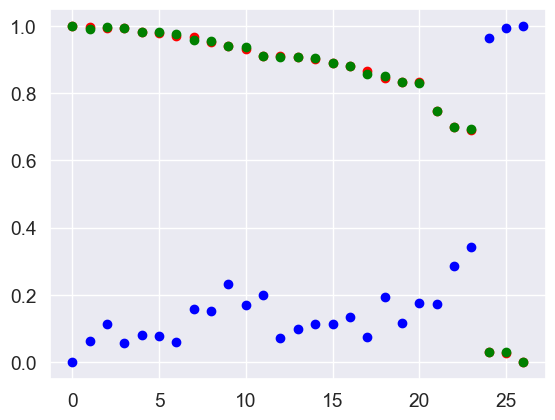

In [922]:
df_GB.head()
df_scaled = df_GB.copy()
to_scale = ["mean_test_log_mean_sq_error",	"mean_test_root_mse", "mean_test_r2"]
df_scaled[to_scale] = pd.DataFrame(MinMaxScaler().fit_transform(df_scaled[to_scale]))
plt.scatter(df_GB.index, df_scaled["mean_test_log_mean_sq_error"],color="red");
plt.scatter(df_GB.index, df_scaled["mean_test_root_mse"],color="blue");
plt.scatter(df_GB.index, df_scaled["mean_test_r2"],color="green");

We see that the three metrics seem to agree, we will then keep the model that has the best score using the sq_mse_log

In [927]:
print(grid_GB.best_params_)
chosen = grid_GB.best_estimator_ 
chosen

{'model__learning_rate': 0.05, 'model__n_estimators': 500, 'model__n_iter_no_change': 10}


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  array(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea',
       'GarageCars', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LowQualFinSF', 'MiscVal', '...
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'Exterior1st', 'Exterior2nd',
                                                   'ExterQual', 'ExterCond',
                                                   'Foundation', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'Functional', 'PavedDrive',
                                                   'SaleType', 'SaleCondition',
                                                   'MSSubClass', 'OverallQual', ...])])),
                ('model',
                 GradientBoostingRegressor(learning_rate=0.05, n_estimators=500,
                                           n_iter_no_change=10))])

In [924]:
#TODO: analyze why sq_log_mse is so far off - maybe calculating wrong
y_pred = chosen.predict(X_val)
print("train errors")
print(f"sq_log_mse: {df_GB.iloc[0]['mean_test_log_mean_sq_error']:.3f}\nsq_mse: {df_GB.iloc[0]['mean_test_root_mse']:.3f}\nrs_score: {df_GB.iloc[0]['mean_test_r2']:.3f}")
print("validation errors")
print(f"sq_log_mse: {mean_squared_error(y_val, y_pred):.3f}\nsq_mse: {mean_squared_error(np.exp(y_val), np.exp(y_pred)):.3f}\nrs_score: {r2_score(y_val,y_pred):.3f}")

train errors
sq_log_mse: -0.022
sq_mse: 34818.977
rs_score: 0.863
validation errors
sq_log_mse: 0.019
sq_mse: 529702080.713
rs_score: 0.889


Let's now analyze where does our model make the most mistakes

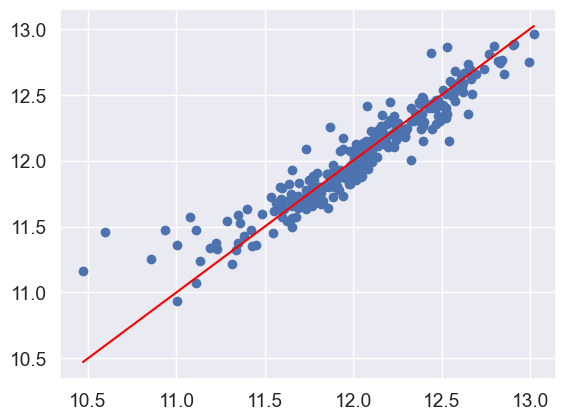

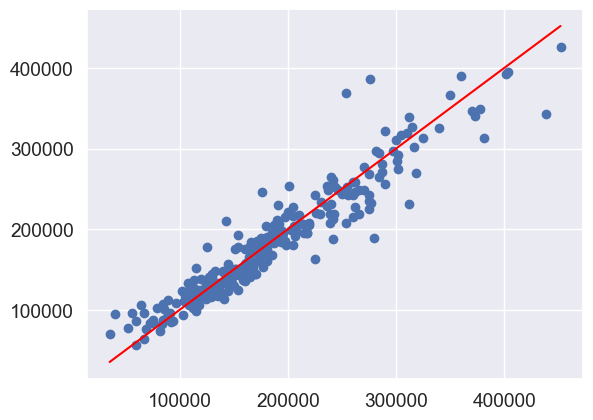

In [925]:
plt.subplots(1)
plt.scatter(x=y_val, y=y_pred);
plt.plot([np.min(y_val), np.max(y_val)], [np.min(y_val), np.max(y_val)], c = "red");
plt.subplots(1)
plt.scatter(x=np.exp(y_val), y=np.exp(y_pred))
plt.plot([np.exp(np.min(y_val)), np.exp(np.max(y_val))], [np.exp(np.min(y_val)), np.exp(np.max(y_val))], c = "red");

<Figure size 3000x1800 with 0 Axes>

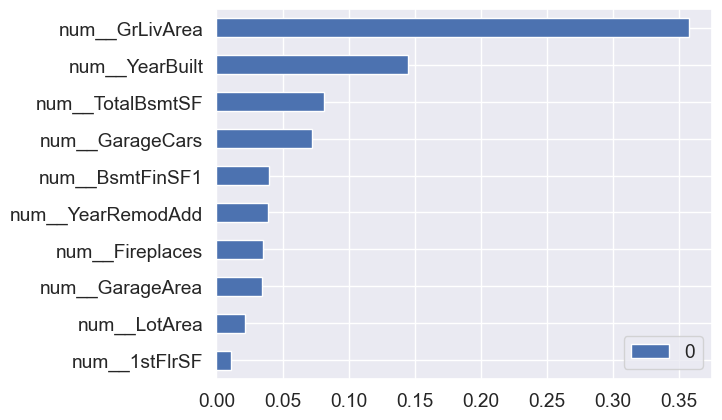

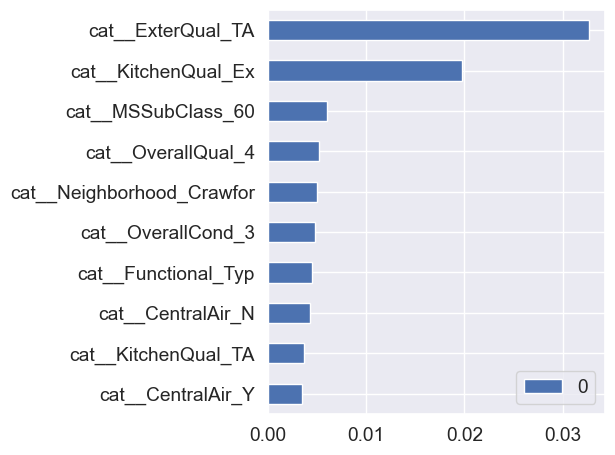

In [926]:
gb_model = chosen["model"]
coefs = np.array(gb_model.feature_importances_)
num_feat_coef, cat_feat_coef = get_features_dictionaries(coefs)
plt.figure(figsize=(30,18))
coefs = pd.DataFrame.from_dict(num_feat_coef,orient='index')[-10:]
coefs.plot(kind="barh")
coefs = pd.DataFrame.from_dict(cat_feat_coef,orient='index')[-10:]
coefs.plot(kind="barh")
plt.tight_layout()

For the numerical categories it does make a lot of sense :) 